In [4]:
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.datasets import load_digits
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

In [12]:
digits=load_digits()
print(digits)

{'data': array([[ 0.,  0.,  5., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ..., 10.,  0.,  0.],
       [ 0.,  0.,  0., ..., 16.,  9.,  0.],
       ...,
       [ 0.,  0.,  1., ...,  6.,  0.,  0.],
       [ 0.,  0.,  2., ..., 12.,  0.,  0.],
       [ 0.,  0., 10., ..., 12.,  1.,  0.]]), 'target': array([0, 1, 2, ..., 8, 9, 8]), 'frame': None, 'feature_names': ['pixel_0_0', 'pixel_0_1', 'pixel_0_2', 'pixel_0_3', 'pixel_0_4', 'pixel_0_5', 'pixel_0_6', 'pixel_0_7', 'pixel_1_0', 'pixel_1_1', 'pixel_1_2', 'pixel_1_3', 'pixel_1_4', 'pixel_1_5', 'pixel_1_6', 'pixel_1_7', 'pixel_2_0', 'pixel_2_1', 'pixel_2_2', 'pixel_2_3', 'pixel_2_4', 'pixel_2_5', 'pixel_2_6', 'pixel_2_7', 'pixel_3_0', 'pixel_3_1', 'pixel_3_2', 'pixel_3_3', 'pixel_3_4', 'pixel_3_5', 'pixel_3_6', 'pixel_3_7', 'pixel_4_0', 'pixel_4_1', 'pixel_4_2', 'pixel_4_3', 'pixel_4_4', 'pixel_4_5', 'pixel_4_6', 'pixel_4_7', 'pixel_5_0', 'pixel_5_1', 'pixel_5_2', 'pixel_5_3', 'pixel_5_4', 'pixel_5_5', 'pixel_5_6', 'pixel_5_7', 'pixel_6_0', '

In [7]:
df=pd.DataFrame(digits.data)
df["target"]=digits.target
print(df.head())

     0    1    2     3     4     5    6    7  ...   57   58    59    60    61   62   63  target
0  0.0  0.0  5.0  13.0   9.0   1.0  0.0  0.0  ...  0.0  6.0  13.0  10.0   0.0  0.0  0.0       0
1  0.0  0.0  0.0  12.0  13.0   5.0  0.0  0.0  ...  0.0  0.0  11.0  16.0  10.0  0.0  0.0       1
2  0.0  0.0  0.0   4.0  15.0  12.0  0.0  0.0  ...  0.0  0.0   3.0  11.0  16.0  9.0  0.0       2
3  0.0  0.0  7.0  15.0  13.0   1.0  0.0  0.0  ...  0.0  7.0  13.0  13.0   9.0  0.0  0.0       3
4  0.0  0.0  0.0   1.0  11.0   0.0  0.0  0.0  ...  0.0  0.0   2.0  16.0   4.0  0.0  0.0       4

[5 rows x 65 columns]


In [13]:
kMeans=KMeans(n_clusters=10,random_state=42)
kMeans.fit(digits.data)


KMeans(n_clusters=10, random_state=42)

In [14]:
df["cluster"]=kMeans.labels_
print(df.head())

     0    1    2     3     4     5    6    7  ...   58    59    60    61   62   63  target  cluster
0  0.0  0.0  5.0  13.0   9.0   1.0  0.0  0.0  ...  6.0  13.0  10.0   0.0  0.0  0.0       0        5
1  0.0  0.0  0.0  12.0  13.0   5.0  0.0  0.0  ...  0.0  11.0  16.0  10.0  0.0  0.0       1        7
2  0.0  0.0  0.0   4.0  15.0  12.0  0.0  0.0  ...  0.0   3.0  11.0  16.0  9.0  0.0       2        7
3  0.0  0.0  7.0  15.0  13.0   1.0  0.0  0.0  ...  7.0  13.0  13.0   9.0  0.0  0.0       3        6
4  0.0  0.0  0.0   1.0  11.0   0.0  0.0  0.0  ...  0.0   2.0  16.0   4.0  0.0  0.0       4        4

[5 rows x 66 columns]


In [25]:
pca=PCA(n_components=2)
pca_result=pca.fit_transform(digits.data)


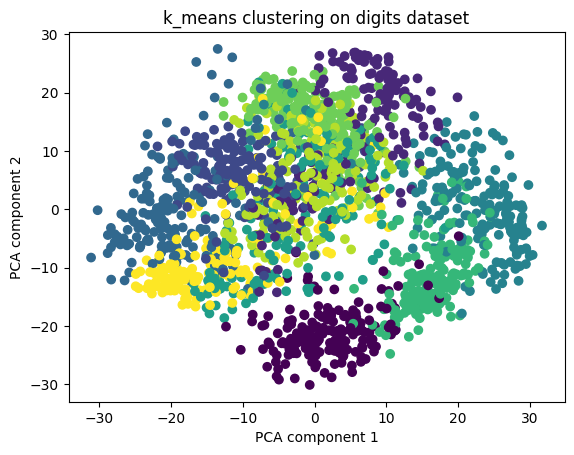

In [28]:
plt.scatter(pca_result[:,0],pca_result[:,1],c=digits.target,cmap="viridis")
plt.xlabel("PCA component 1")
plt.ylabel("PCA component 2")
plt.title("k_means clustering on digits dataset")
plt.show()

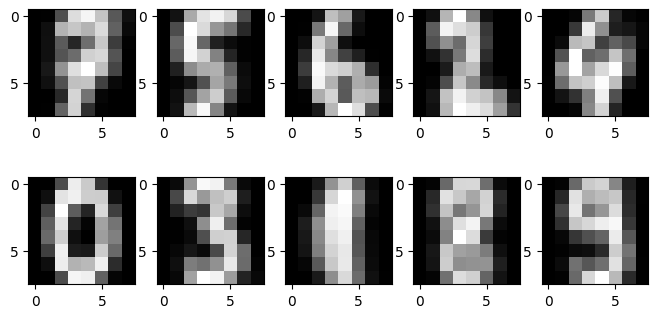

In [30]:
cluster_centers=kMeans.cluster_centers_.reshape(10,8,8)
fig,axes=plt.subplots(2,5,figsize=(8,4))
for ax,center in zip(axes.ravel(),cluster_centers):
    ax.imshow(center,cmap="gray")
plt.show()